In [1]:
__author__ = 'Guillermo Damke <gdamke@gmail.com>, Francisco Förster <francisco.forster@gmail.com>, Alice Jacques <alice.jacques@noirlab.edu>'
__version__ = '20210119' # yyyymmdd;
__datasets__ = ['Iris flower dataset']
__keywords__ = ['Introduction to Machine Learning', 'Supervised Machine Learning', 'La Serena School for Data Science']

# Introduction to Supervised Machine Learning - Basic Concepts

*In original form by Francisco Forster, Centro de Modelamiento Matemático (CMM), Universidad de Chile / Instituto Milenio de Astrofísica (MAS). Adaptated for NOIRLab Astro Data Lab by Guillermo Damke and Alice Jacques.*

#### This notebook is part of the curriculum of the 2019 La Serena School for Data Science.

## Table of Contents

This notebook presents an introduction to topics in Machine Learning, in the following sections:

* [General concepts in Machine Learning](#1---General-concepts-in-Machine-Learning)

* [Supervised (and Unsupervised) Machine Learning methods](#2---Supervised-and-Unsupervised-Machine-Learning)

* [Metrics to evaluate model performance](#3---Metrics-to-evaluate-model-performance)

* [Diagnostics](#4---Diagnostics)

* [Visual representations of results](#5---Visual-representations-of-results)

# Summary
This notebook introduces several concepts and definitions that are common in Machine Learning. Practical examples of these concepts are presented in a separate notebook.

# 1 - General concepts in Machine Learning

## 1.1 - Overfitting, underfitting, and the bias-variance tradeoff


### Overfitting and Underfitting

Two important concepts in machine learning are **overfitting** and **underfitting**.

If a model represents our data too accurately (**overfitting**), it may not effectively generalize unobserved data.

If a model represents our data too generally (**underfitting**), it may underrepresent the features of the data.

A popular solution to reduce overfitting consists of adding structure to the model through **regularization**. This favors simpler models through training inspired by **[Occam's razor](https://en.wikipedia.org/wiki/Occam%27s_razor)**.

### Bias

* Quantifies the precision of the model across the training sets.

### Variance 

* Quantifies how sensitive the model is to small changes in the training set.

### Bias-variance tradeoff

The plot below shows the **bias-variance tradeoff**, which is a common problem in Supervised Machine Learning algorithms. It is related to model selection. A model with high complexity describes the training data well (low training error), but may not effectively generalize  when applied to new data (high validation error, i.e., high error in predicting when presented to new data). A simpler model is not prone to overfitting the noise in the data, but it may underrepresent the features of the data (**underfitting**).

![](Images/biasvariance.png)

## 1.2 - Complexity, accuracy, robustness

In general, we want precise and robust models. 

**Simpler models tend to be less accurate, but more robust.**

**More complex models tend to be more accurate, but less robust.**

This tension is usually expressed as the **bias-variance tradeoff** which is central to machine learning.

## 1.3 - Model selection

No one model performs uniformly better than another. One model may perform well in one data set and poorly in another.

## 1.4 - Classification vs. regression

The figure below represents two usual tasks performed with Machine Learning.

* **Classification**: refers to predicting to what class or category an object belongs to, given some input data about that object. In this case, the output is a category, class, or label (i.e., a discrete variable).

* **Regression**: refers to predicting an output real value, given some input data. In this case, the output is a continuous variable.

![](Images/ml.png)

# 2 - Supervised and Unsupervised Machine Learning

In this section, we will introduce two different learning algorithms, which are considered either as Supervised or Unsupervised Machine Learning.

## 2.1 - Predictive or *Supervised Learning*:

Learn a mapping from inputs ${\bf x}$ to outputs $y$, given a **labeled** set of input-output pairs $D=\lbrace{({\bf x_i}, y_i)\rbrace}_{i=1}^N$.

$D$ is called the **training set**.
  
Each training input ${\bf x_i}$ is a vector of dimension $M$, with numbers called **features**, **attributes** or **covariates**. They are usually stored in a $N \times M$ **design matrix** ${\bf X}$.


An important consideration, as mentioned above:
    
* When $y$ is **categorical** the problem is known as **[classification](#1.4---Classification-vs.-regression)**.
    
* When $y$ is **real-valued** the problem is known as **[regression](#1.4---Classification-vs.-regression)**.

### Example of a labeled training set: the "Iris flower dataset".

The **Iris flower dataset** is commonly utilized in Machine Learning tests and examples for problems in categorical classification. Because of this, the dataset is included in several Python libraries, including the Seaborn library which we will use below.

The **Iris flower dataset** includes four real-valued variables (length and width of petals and sepals) for 50 samples of each three species of Iris (versicolor, virginica, and setosa):

![Iris](Images/iris.png)

![Irises](Images/irises.png)

#### What does this dataset look like?

Let's read the dataset and explore it with the Seaborn library:

In [2]:
import seaborn as sns
%matplotlib inline
sns.set(style="ticks")

dfIris = sns.load_dataset("iris")
print("Design matrix shape (entries, attributes):", dfIris.shape)
print("Design matrix columns:", dfIris.columns)

Design matrix shape (entries, attributes): (150, 5)
Design matrix columns: Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


It can be seen that the dataset contains 150 entries with 5 atributes (columns).

We can view the first five entries with the `head` function:

In [3]:
dfIris.head()
# Notice that the real-valued variables are in centimeters.

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


The function `info` prints "a concise summary" of a DataFrame:

In [4]:
dfIris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


While the function `describe` is used to "generate descriptive statistics" of a DataFrame:

In [5]:
dfIris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


For a quick visual exploration of the dataset, we can use the `pairplot` function of the Seaborn library.
We will pass the `hue="species"` argument, so that the three species (labels) in the dataset are represented by different colors.

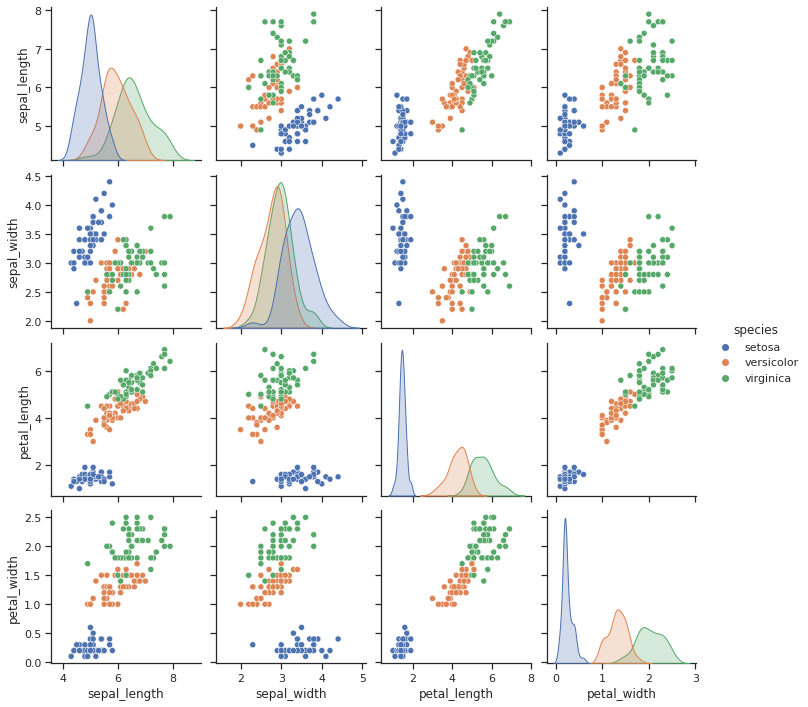

In [6]:
sns.pairplot(dfIris, hue="species");

We will train a model to predict the Iris classes in Section 4 of this notebook.

In addition, some applications of Supervised Machine Learning algorithms is presented in the ["04_Intro_Machine_Learning_practical"](https://github.com/astro-datalab/notebooks-latest/blob/master/06_EPO/LaSerenaSchoolForDataScience/2019/04_Intro_Machine_Learning_practical/Intro_Machine_Learning_practical.ipynb) entry of this series.

## 2.2 - Descriptive or *Unsupervised Learning*

Only inputs are given: $D=\lbrace{{\bf x_i}\rbrace}_{i=1}^N$
    
The goal here is to find interesting patterns, which is sometimes called **knowledge discovery**.
  
The problem is not always well defined. It may not be clear what kind of pattern to look for, and there may not be an obvious metric to use (unlike supervised learning).

Some applications of Unsupervised Machine Learning algorithms are presented in the ["04_Intro_Machine_Learning_practical"](https://github.com/astro-datalab/notebooks-latest/blob/master/06_EPO/LaSerenaSchoolForDataScience/2019/04_Intro_Machine_Learning_practical/Intro_Machine_Learning_practical.ipynb) entry of this series.

## 2.3 - Reinforcement Learning

Mixed between Supervised and Unsupervised. Only occasional reward or punishement signals are given (e.g. baby learning to walk).

# 3 - Metrics to evaluate model performance

## 3.1 - Classification loss

Learning algorithms, and optimization algorithms, need to quantify if the predicted value from a model agrees with the true value. The learning process involves a minimization process in which a **loss function** penalizes the wrong outcomes.

### Loss function and classification risk:

The most common loss function used for supervised classification is the **zero-one** loss function:

$L(y, \hat y) = \delta(y \ne \hat y)$

where $\hat y$ is the best guess value of $y$. The function is 1 if the guess is different than the true value; and 0 if the guess is the same as the true value.

The **classification risk** of a model is the expectation value of the loss function:

$E[L(y, \hat y)] = p(y \ne \hat y)$

For the zero-one loss function the risk is equal to the **misclassification rate** or **error rate**.

## 3.2 - Types of errors

Accuracy and classification risk are not necessarily good diagnostics of the quality of a model. 

It is better to distinguish between two types of errors (assuming 1 is the label we are evaluating):

1. Assigning the label 1 to an object whose true class is 0 (a **false positive**)

2. Assigning the label 0 to an object whose true class is 1 (a **false negative**)

![](Images/ErrorTypes.jpeg)
(Image from http://opendatastat.org/mnemonics/)

Additionally, correct cases can be separated as:

- Assigning the label 1 to an object whose true class is 1 is a **true positive**.
- Assigning the label 0 to an object whose true class is 0 is a **true negative**.

# 4 - Diagnostics

Applying the concepts introduced above, it is possible to define several diagnostics or metrics in Machine Learning to evaluate the goodness of a given algorithm applied to a dataset.



## 4.1 - Accuracy, contamination, recall, and precision

These four metrics are defined as:

$$\rm accuracy = \frac{\#\ correct\ labels}{total}$$

Note that this is one minus the classification risk (defined in [Section 3.1](#3.1---Classification-loss)).

$$\rm contamination\ =\ \frac{false~ positives}{true~ positives~ +~ false~ positives}$$

$$\rm recall\ =\ \frac{true~ positives}{true~ positives~ +~ false~ negatives}$$


$$\rm precision\ = 1 - contamination = \ \frac{true~ positives}{true~ positives~ +~ false~ positives}$$


Note: Sometimes, **recall** is also called **completeness**.

## 4.2 - Macro vs. micro averages

The definitions given above can be applied directly in a two-class problem. However, when evaluating the different diagnostics in a **multiclass problem** (i.e., non-binary classification) one has to choose to do macro or micro averages.

**Macro averaging**

Compute diagnostics for every class by taking the average of the class diagnostics.
    

**Micro averaging**

Compute diagnostics for the total errors without making a distinction between classes (True Positive, False Positive, False Negative).
    

For example, consider the following 3-class problem:

| Label | TP | FP | FN | Precision | Recall |
| - | - | - | - | - | - |
| c1 | 3 | 2 | 7 | 0.6 | 0.3 |
| c2 | 1 | 7 | 9 | 0.12 | 0.1 |
| c3 | 2 | 5 | 6 | 0.29 | 0.25 |
| Total | 6 | 14 | 22 | | | 
| Macro averaged | | | | 0.34 | 0.22 |
| Micro averaged | | | | 0.3 | 0.21 |


In this case, the value for macro precision is:

\begin{align}
\rm Macro_{precision} &= \rm average \big(precision(c1), precision(c2), precision(c3)\big) \\
& = \frac{1}{3} \times \biggl( \frac{3}{3 + 2} + \frac{1}{1 + 7} + \frac{2}{2 + 5} \biggr) = 0.34
\end{align}

And the value for micro precision is:

\begin{align}
\rm Micro_{precision} &= \rm precision(total) \\
& = \frac{6}{6 + 14} = 0.3
\end{align}

## 4.3 True positive rate (TPR) and false positive rate (FPR)

These scores are defined as:

$$\rm TPR\ =\ recall\ =\ \frac{true~ positives}{true~ positives~ +~ false~ negatives}$$


$$\rm FPR\ = \ \frac{false~ positives}{false~ positives~ +~ true~ negatives}$$



![Precision and recall](Images/Precisionrecall.svg.png)

(image by user Walber in Wikipedia. CC BY-SA 4.0)

## 4.4 - Problems with accuracy 

As introduced above, accuracy is defined as:

$$\rm accuracy\ =\ \frac{\#~ Total~ of~ correct~ predictions}{\#~ Total~ number~ of~ predictions}$$


To show why accuracy is not a very useful statistic let's consider the following example.

**Example:** A model to predict whether a person is from a given country (with a population of 37 million people):

*Simple (and wrong) model*: assuming that the world population is 7.5 billion people, predict that a person is from that country with a probability 37/7500.

$$ \rm{correct\ predictions} = (7,500,000,000 - 37,000,000) \times \bigg(1 - \frac{37}{7500}\bigg) + 37,000,000 \times \frac{37}{7500} = 7,426,365,067$$

Then, accuracy becomes:

$$\rm accuracy = \frac{7,426,365,067}{7,500,000,000} = 0.99$$


Our classifier is 99% accurate, but it is clearly too simplistic!

### Precision and recall are better statistics

Let's try precision and recall instead. First, calculate the TP, FP and FN:

True positives (TP): $37,000,000 \times \frac{37}{7500} = 182,533$

False positives (FP): $(7,500,000,000 - 37,000,000) \times \frac{37}{7500} = 36,817,467$

False negatives (FN): $37,000,000 \times \big(1 - \frac{37}{7500}\big) = 36,817,467$

Then, we evaluate **recall** and **precision**:

$$\rm recall = \frac{TP}{TP + FN} = \frac{182,533}{182,533 + 36,817,467} = 0.005$$

$$\rm precision = \frac{TP}{TP + FP} = \frac{182,533}{182,533 + 36,817,467} = 0.005$$

Our classifier has only 0.5% recall and precision!

## 4.5 - F1 score

A simple statistic which takes into account both recall and precision is the  **$\rm \bf F_1$ score**, which is twice their harmonic mean. It is defined as:


$$\rm F_1 = 2 \times \ \frac{1}{\frac{1}{precision}\ +\ \frac{1}{recall}} = 2 \times \ \frac{precision\ \times\ recall}{precision\ +\ recall}$$

## 4.6 - F$_\beta$ score

To give more or less weight to recall vs precision, the $F_\beta$ score is used:

$$\rm F_\beta = (1 + \beta^2) \times \frac{precision\ \times\ recall}{\beta^2\ precision\ +\ recall}$$

$F_\beta$ was derived so that it measures the effectiveness of retrieval with respect to a user who attaches **$\beta$ times as much importance to recall as precision**.

# 5 - Visual representations of results

## 5.1 - Confusion matrix

Also known as **error matrix**, it is a way to summarize results in classification problems.

The elements of the matrix correspond to the number (or fraction) of instances of an actual class which were classified as another class.

A perfect classifier has the *identity* as its normalized confusion matrix.

For example, a classifier for the Iris flower dataset could yield the following results:

![](Images/confusion_unnorm.png)

<br></br>
<br></br>

![](Images/confusion_norm.png)

## 5.2 - ROC curve

The **Receiver Operating Characteristic (ROC)** curve is a visualization of the tradeoff between the recall and precision of a classifier as the discrimination threshold is varied.

It plots the **True Positive Rate (TPR)** vs the **False Positive Rate (FPR)** at various thresholds.


![](Images/ROC.png)

The demo below shows the ROC curve for a classifier as the discrimination between TP and FP varies.

In [7]:
from IPython.display import Image
Image(url="Images/roc_curve.gif")

This demonstration is described [here](https://arogozhnikov.github.io/2015/10/05/roc-curve.html).

## 5.3 - Area under the curve (AUC) and Gini coefficient (G1)

The AUC is equal to the probability that the classifier will rank a randomly chosen positive instance higher than a randomly chosen negative one.

 * A larger AUC indicates a better classification model
 * A perfect classifier has AUC = 1
 * A random classifier has AUC = 0.5 (note that the **no-discrimination line** is the identity) 
 * AUC is related to the G1, which is twice the area between the ROC and the no-discrimination line: 
 
 $\Large \rm G_1 = 2 \times AUC - 1$ 
 ![Gini image](Images/gini.png)

The ROC AUC statistic is normally used to do model comparison.

## 5.4 - DET curve

An alternative to the ROC curve is the **Detection Error Tradeoff (DET)** curve.

The DET curve plots the **FNR (missed detections) vs. the FPR (false alarms)** on a non-linearly transformed axis in order to emphasize regions of low FPR and low FNR.

![DET image](Images/DET.png)

# In Conclusion

This has been a brief introduction of concepts in Machine Learning with  focus on classification (Supervised Learning). Special emphasis has been put into introducing a variety of concepts and metrics that should be especially useful for the evaluation of Machine Learning algorithms in classification problems. Finally, we introduced some common visual representations of results, which are useful to summarize model performance.